In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#to be done once only 
!unzip -q "/content/drive/My Drive/ECE1512_project/hand_written/char.zip" -d "/content/drive/My Drive/ECE1512_project/hand_written/char"

replace /content/drive/My Drive/ECE1512_project/hand_written/char/char/test/!/!_7731.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [0]:
!ls "/content/drive/My Drive/ECE1512_project/hand_written/char/char/train"

'='   +   9	      div	      H        leq   phi	  sqrt	  y
 -    0   A	      e		      i        lim   pi		  sum	  z
 ,    1   alpha       exists	      in       log   pm		  T
'!'   2   ascii_124   f		      infty    lt    prime	  tan
'('   3   b	      forall	      int      M     q		  theta
')'   4   beta	      forward_slash   j        mu    R		  times
'['   5   C	      G		      k        N     rightarrow   u
 ]    6   cos	      gamma	      l        neq   S		  v
'{'   7   d	      geq	      lambda   o     sigma	  w
'}'   8   Delta       gt	      ldots    p     sin	  X


In [0]:
import tensorflow
import keras

from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

import os

import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
root_dir = "/content/drive/My Drive/ECE1512_project/hand_written/char/char/train"
SYMBOLS = os.listdir(root_dir)
print([symbol for symbol in SYMBOLS])

['}', '{', '[', ']', 'lt', 'M', 'mu', 'N', 'neq', 'o', 'p', 'phi', 'pi', 'pm', 'prime', 'q', 'R', 'rightarrow', 'S', 'sigma', 'sin', 'sqrt', 'sum', 'T', 'tan', 'theta', 'times', 'u', 'v', 'w', 'X', 'y', 'z', '!', '(', ')', '+', ',', '-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '=', 'A', 'alpha', 'ascii_124', 'b', 'beta', 'C', 'cos', 'd', 'Delta', 'div', 'e', 'exists', 'f', 'forall', 'forward_slash', 'G', 'gamma', 'geq', 'gt', 'H', 'i', 'in', 'infty', 'int', 'j', 'k', 'l', 'lambda', 'ldots', 'leq', 'lim', 'log']


In [0]:
import glob
from skimage import transform,io
from skimage.filters import threshold_mean
#Read in the data
X_binary_image = [] 
Y_binary_image = []
target_sz = (32, 32)

In [0]:
for i in range(19, len(SYMBOLS)):
    print('Reading Data for {}-th Class'.format(i))
    for a_img_path in glob.glob(os.path.join(root_dir, SYMBOLS[i]) + "/*.jpg"):
        
        # read
        im = io.imread(a_img_path)
        
        # resize
        im = transform.resize(im, target_sz, mode='symmetric', preserve_range=True)
        
        # threashold to convert it to binary
        thresh = threshold_mean(im)
        binary = im > thresh
        
        # binary conversion
        binary[binary == True] = 1
        binary[binary == False] = 0
        
        X_binary_image.append(binary)
        Y_binary_image.append(i)

In [0]:
cls_counts = np.hstack(Y_binary_image)
plt.hist(cls_count)
plt.title('Class Weights')
plt.xlabel('Class')
plt.ylabel('Counts')
plt.show()

In [0]:
Y = keras.utils.to_categorical(Y_binary_image, len(SYMBOLS))

In [0]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

X_binary_image = np.array(X_binary_image)
Y_binary_image = np.array(Y_binary_image)
X_binary_image = X_binary_image.reshape((len(X_binary_image),32, 32))

X_train, X_val, y_train, y_val = train_test_split(X_binary_image, Y, test_size=0.30, random_state=46, shuffle=True, stratify=Y_binary_image)

In [0]:
def plot_fitting(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [0]:
from sklearn.utils.class_weight import compute_class_weight
def get_class_weight(y):
    """

    Used from: https://stackoverflow.com/a/50695814
    TODO: check validity and 'balanced' option
    :param y: A list of one-hot-encoding labels [[0,0,1,0],[0,0,0,1],..]
    :return: class-weights to be used by keras model.fit(.. class_weight="") -> {0:0.52134, 1:1.adas..}
    """
    y_integers = np.argmax(y, axis=1)
    class_weights = compute_class_weight('balanced', np.unique(y_integers), y_integers)
    d_class_weights = dict(enumerate(class_weights))
    return d_class_weights
class_weights = get_class_weight(Y)

In [0]:
#class_weights

In [0]:
#Defining the model 
drop_out_rate = 0.25
#Layer-1
model = Sequential()
model.add(Conv2D(32, kernel_size = (5,5), padding='same', activation = 'relu', input_shape = (32, 32, 1)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(rate = drop_out_rate))

#Layer-2
model.add(Conv2D(64, kernel_size = (3,3), padding='same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(rate = drop_out_rate))

#Layer-3
model.add(Conv2D(128, kernel_size = (3,3), padding='same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(rate = drop_out_rate))

#Layer-4
model.add(Conv2D(256, kernel_size = (3,3), padding='same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(rate = drop_out_rate))
model.add(Flatten())
model.add(Dense(128, activation='relu'))

#Final Layer
model.add(Dense(len(SYMBOLS), activation='softmax', kernel_initializer = keras.initializers.RandomNormal(mean = 0.0, stddev = 1), bias_initializer = keras.initializers.Zeros()))

#compiling the model
model.compile(loss = keras.losses.categorical_crossentropy, optimizer= keras.optimizers.Adam(), metrics = ['accuracy'])

model.summary()




Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        832       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 128)     

In [0]:
def learning_rate_scheduler(epoch):
    return 1e-3*(0.5**(epoch // 5))
checkpoints =  keras.callbacks.ModelCheckpoint("/content/drive/My Drive/ECE1512_project/hand_written/models/CNN_classifier.hdf5",
                              monitor='val_acc',
                              verbose=1,
                              save_best_only=True,
                              save_weights_only=True,
                              mode='max',
                              period=1)
redued_learning_rate_cb = keras.callbacks.LearningRateScheduler(learning_rate_scheduler)
cb_tensorboard = keras.callbacks.TensorBoard(log_dir='./Graph', write_graph=True, write_images=True)

In [0]:
X_train = X_train.reshape(len(X_train),32,32,1)
X_val = X_val.reshape(len(X_val),32,32,1)

In [0]:
history = model.fit(X_train, y_train, epochs = 20, batch_size = 256, validation_data = (X_val, y_val), callbacks = [checkpoints, redued_learning_rate_cb, cb_tensorboard], class_weight = class_weights, verbose = 1)

Train on 262477 samples, validate on 112491 samples
Epoch 1/20
262477/262477 [==============================] - 17s 63us/step - loss: 2.6315 - acc: 0.3747 - val_loss: 0.8341 - val_acc: 0.7595

Epoch 00001: val_acc improved from -inf to 0.75947, saving model to /content/drive/My Drive/ECE1512_project/hand_written/CNN_classifier.h5

Epoch 2/20
262477/262477 [==============================] - 16s 60us/step - loss: 0.7121 - acc: 0.7624 - val_loss: 0.4856 - val_acc: 0.8450

Epoch 00002: val_acc improved from 0.75947 to 0.84497, saving model to /content/drive/My Drive/ECE1512_project/hand_written/CNN_classifier.h5
Epoch 3/20
262477/262477 [==============================] - 15s 59us/step - loss: 0.4910 - acc: 0.8168 - val_loss: 0.4701 - val_acc: 0.8447

Epoch 00003: val_acc did not improve from 0.84497
Epoch 4/20
262477/262477 [==============================] - 15s 59us/step - loss: 0.4008 - acc: 0.8386 - val_loss: 0.3607 - val_acc: 0.8763

Epoch 00004: val_acc improved from 0.84497 to 0.8763

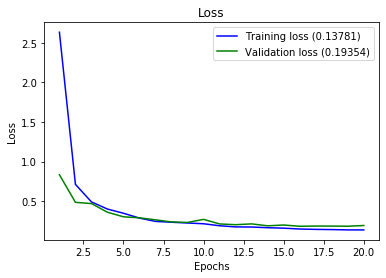

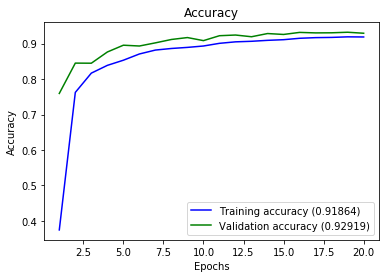

In [0]:
plot_fitting(history)

In [0]:
!ls "/content/drive/My Drive/ECE1512_project/hand_written/models"

CNN-classifier-1.hdf5


In [0]:
SYMBOLS = ['=', '-', ',', '!', '(', ')', '[', ']', '{', '}', '+', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'alpha', 'ascii_124', 'b', 'beta', 'C', 'cos', 'd', 'Delta', 'div', 'e', 'exists', 'f', 'forall', 'forward_slash', 'G', 'gamma', 'geq', 'gt', 'H', 'i', 'in', 'infty', 'int', 'j', 'k', 'l', 'lambda', 'ldots', 'leq', 'lim', 'log', 'lt', 'M', 'mu', 'N', 'neq', 'o', 'p', 'phi', 'pi', 'pm', 'prime', 'q', 'R', 'rightarrow', 'S', 'sigma', 'sin', 'sqrt', 'sum', 'T', 'tan', 'theta', 'times', 'u', 'v', 'w', 'X', 'y', 'z', '']

In [0]:
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import backend as  K

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(32,32,1)))
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(len(SYMBOLS)))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
model.load_weights("/content/drive/My Drive/ECE1512_project/hand_written/models/CNN-classifier-1.hdf5")

In [0]:
test_dir = "/content/drive/My Drive/ECE1512_project/hand_written/char/char/test"
SYMBOLS = os.listdir(test_dir)
print([symbol for symbol in SYMBOLS])

['=', '-', ',', '!', '(', ')', '[', ']', '{', '}', '+', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'alpha', 'ascii_124', 'b', 'beta', 'C', 'cos', 'd', 'Delta', 'div', 'e', 'exists', 'f', 'forall', 'forward_slash', 'G', 'gamma', 'geq', 'gt', 'H', 'i', 'in', 'infty', 'int', 'j', 'k', 'l', 'lambda', 'ldots', 'leq', 'lim', 'log', 'lt', 'M', 'mu', 'N', 'neq', 'o', 'p', 'phi', 'pi', 'pm', 'prime', 'q', 'R', 'rightarrow', 'S', 'sigma', 'sin', 'sqrt', 'sum', 'T', 'tan', 'theta', 'times', 'u', 'v', 'w', 'X', 'y', 'z', '']


In [0]:
X_b_test = []
Y_b_test = []
for i in range(len(SYMBOLS)):
    for a_img_path in glob.glob(os.path.join(test_dir, SYMBOLS[i]) + "/*.jpg"):
        
        # read
        im = io.imread(a_img_path)
        
        # resize
        im = transform.resize(im, target_sz, mode='symmetric', preserve_range=True)
        
        # threashold to convert it to binary
        thresh = threshold_mean(im)
        binary = im > thresh
        
        # binary conversion
        binary[binary == True] = 1
        binary[binary == False] = 0
        
        X_b_test.append(binary)
        Y_b_test.append(i)

In [0]:
Y = keras.utils.to_categorical(Y_b_test, len(SYMBOLS))
X_test = np.array(X_b_test)
Y_test = np.array(Y_b_test)
X_test = X_test.reshape(len(X_test),32,32,1)

In [0]:
y_pred = model.predict(X_test, batch_size=128, verbose=2)

In [0]:
Y_cls = np.argmax(Y, axis =1)
Y_cls

array([ 0,  0,  0, ..., 81, 81, 81])

In [0]:
from sklearn.metrics import confusion_matrix
y_cls_p = np.argmax(y_pred, axis = 1)
CM = confusion_matrix(Y_cls, y_cls_p)
CM

array([[12,  0,  0, ...,  0,  0,  0],
       [ 0, 12,  0, ...,  0,  0,  0],
       [ 0,  0, 10, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 45,  0,  0],
       [ 0,  0,  0, ...,  0, 15,  0],
       [ 0,  0,  0, ...,  0,  0, 19]])

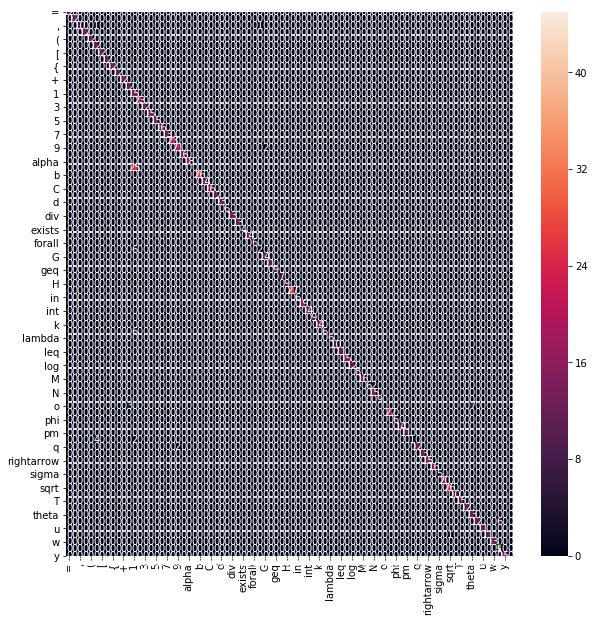

In [0]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(CM, index = SYMBOLS, columns = SYMBOLS)
plt.figure(figsize = (10,10))
sn.heatmap(df_cm, annot=True)

In [0]:
test_acc = np.sum(y_cls_p == Y_cls)/len(Y_cls)
print('Test accuracy of the CNN is {}'.format(test_acc))

Test accuracy of the CNN is 0.9396092362344582


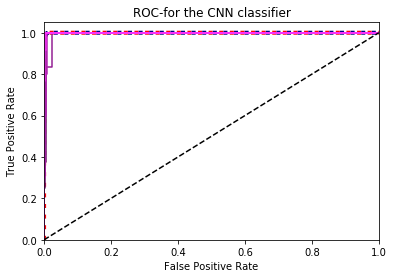

In [0]:
# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle

lw = 1.5 
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(SYMBOLS)):
    fpr[i], tpr[i], _ = roc_curve(Y[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(SYMBOLS))]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(len(SYMBOLS)):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= len(SYMBOLS)

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='red', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(len(SYMBOLS)), colors):
    plt.plot(fpr[i], tpr[i], color=[i/len(SYMBOLS), 0.2*(i/len(SYMBOLS)), i/len(SYMBOLS)], lw=lw, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-for the CNN classifier')
#plt.legend(loc="lower right")
plt.show()
